In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import math
import os

import pytesseract
from pytesseract import Output


# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45 :
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

In [2]:
image = cv2.imread('testImages/testImage1.jpg')
#image = cv2.imread('testImages/testImage2.jpg')
imageCopy = image.copy()
#image = cv2.imread('testImages/class_a/equ31.jpg')

grayImg = get_grayscale(image)
threshImg = thresholding(grayImg)
openImg = opening(grayImg)
cannyImg = canny(grayImg)

In [3]:
img = threshImg
custom_config = r'--oem 3 --psm 6 outputbase digits'

d = pytesseract.image_to_data(img, config=custom_config, output_type=Output.DICT)
n_boxes = len(d['level'])
boxList = []
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    #Check if the absolute lenght or hight is too high
    #Check if the ratio is too high
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    boxList.append((x, y, x + w, y + h))


75
75
(1376, 1223, 2045, 1309)
(86, 669, 3)


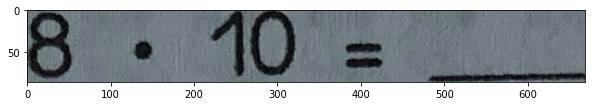

In [6]:
n = 25

print(len(boxList))
print(n_boxes)
print(boxList[n])
a = boxList[n][0]
b = boxList[n][1]
c = boxList[n][2]
d = boxList[n][3]
cropImg = imageCopy[b:d,a:c]
print(cropImg.shape)

plt.figure(figsize=(10,10))
plt.imshow(cropImg)

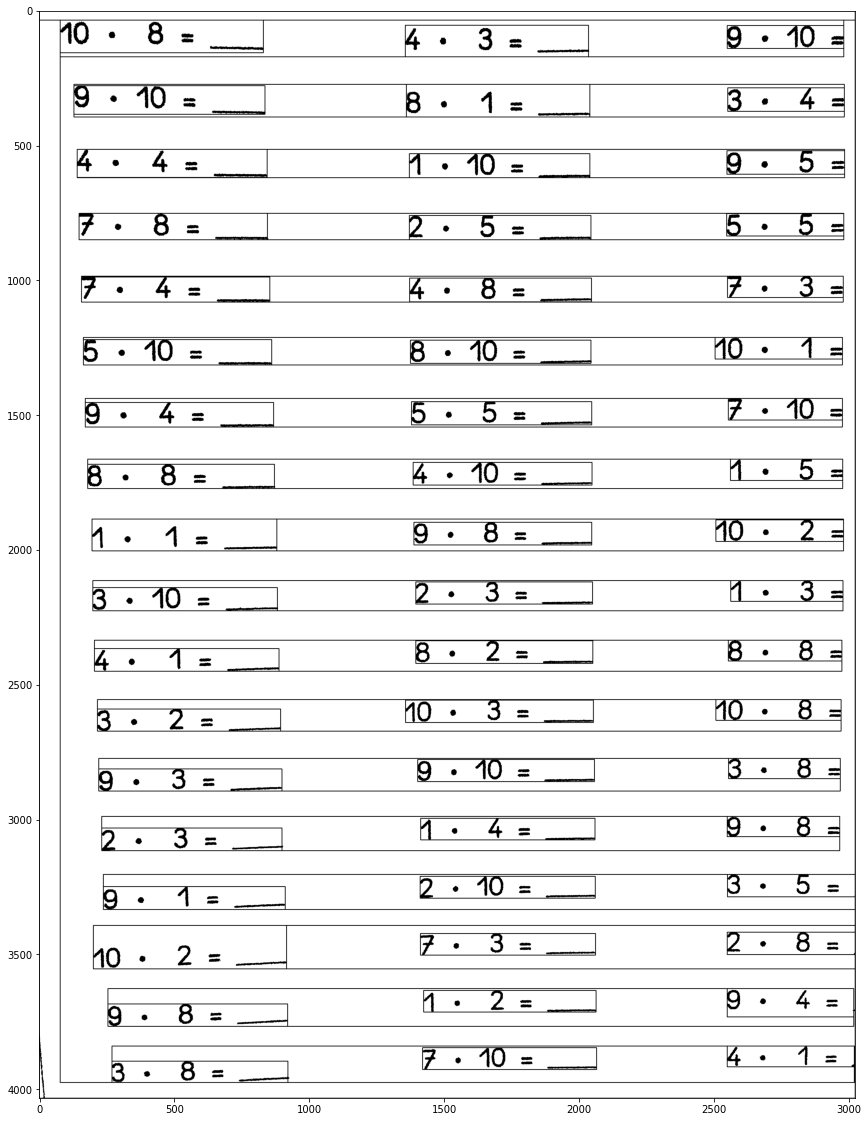

In [5]:
plt.figure(figsize=(20,20))
plt.imshow(img, cmap = 'gray')